# HEART DISEASE PREDICTION USING MACHINE LEARNING

MACHINE LEARNING ALGORITHMS : 

1. LOGISTIC REGRESSION 
2. DECISION TREE
3. RANDOM FOREST
4. K-NEAREST NEIGHBOURS 
5. SUPPORT VECTOR MACHINE
6. ADABooST

IMPORTING THE DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


DATA COLLECTION AND PROCESSING

In [2]:
#loading the csv data to a pandas DataFrame

heart_data=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\DATA ANALYSIS PROJECT\heart_disease_data.csv")

In [3]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#print first 5 rows of the data set

heart_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#print last 5 rows of the data set

heart_data.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#to check number of rows and columns in the data set
heart_data.shape

(303, 14)

In [7]:
# getting information about the data

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# to check for missing values

heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

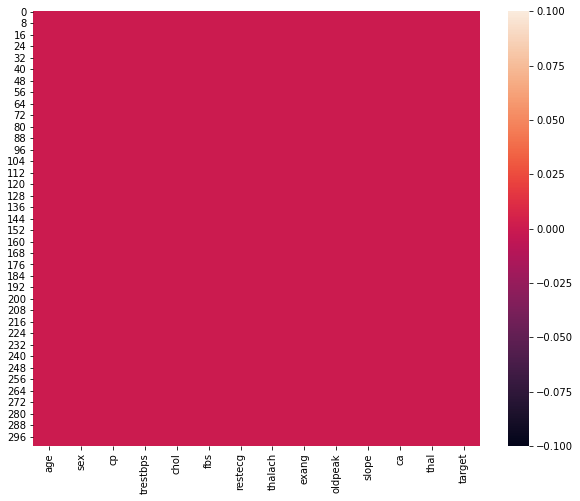

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(heart_data.isnull())

<AxesSubplot:>

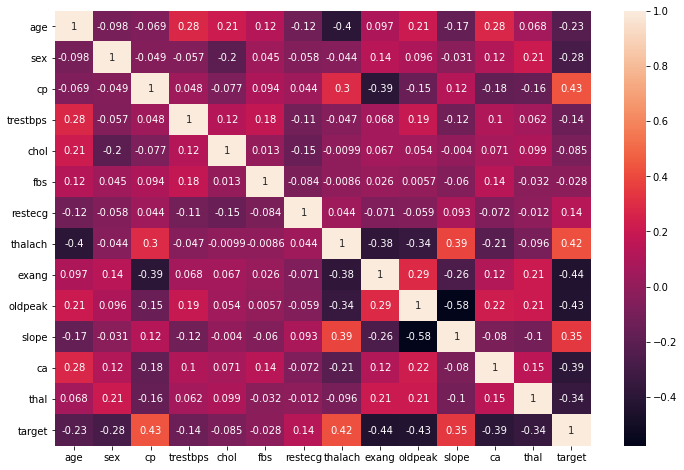

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(heart_data.corr(),annot=True)

<AxesSubplot:xlabel='target', ylabel='count'>

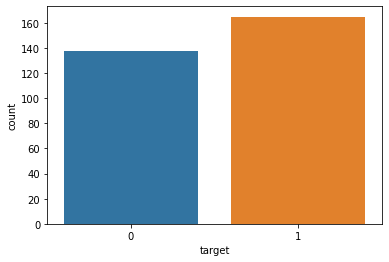

In [11]:
sns.countplot(x="target",data=heart_data)

In [15]:
heart_data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

IndexError: index 10 is out of bounds for axis 0 with size 10

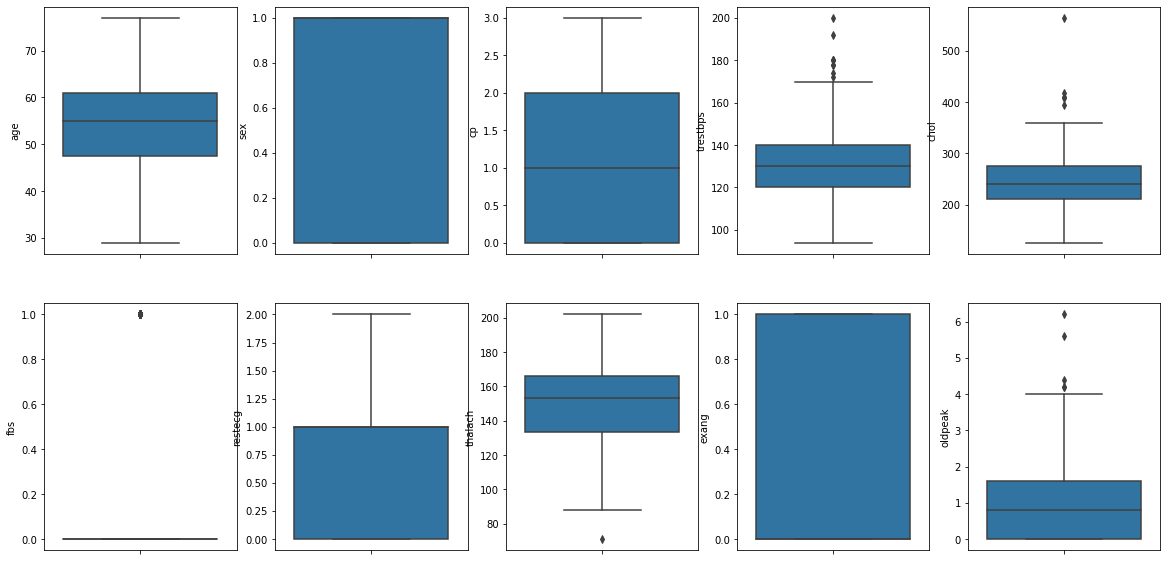

In [17]:
#visualization dataset also checking for outliers

fig, ax=plt.subplots(ncols=5,nrows=2,figsize=(20,10))
ax=ax.flatten()

index=0

for col,values in heart_data.items():
    sns.boxplot(y=col,data=heart_data,ax=ax[index])
    index +=1

In [ ]:
sns.pairplot(heart_data)

Text(0, 0.5, 'PERCENTAGE OF MISSING VALUES')

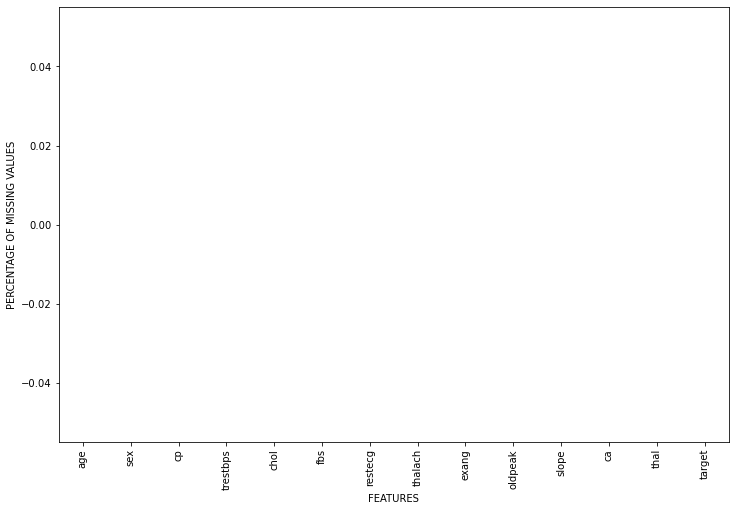

In [18]:
heart_data.isnull().mean().plot.bar(figsize=(12,8))
plt.xlabel("FEATURES")
plt.ylabel("PERCENTAGE OF MISSING VALUES")

In [19]:
#to get the statistical measures about the data

heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
x=heart_data.drop("target",axis=1)
y=heart_data["target"]

In [21]:
x.shape,y.shape

((303, 13), (303,))

In [22]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [23]:
# checking the distribution of target variable 
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

DEFECTIVE HEART ( REPRESENTED BY 1)

HEALTHY HEART   ( REPRESENTED BY 0)

SPLITTING THE FEATURES AND TARGET

In [24]:
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target'] 

In [25]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [26]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


SPLITTING THE DATA INTO TRAINING DATA AND TEST DATA

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [28]:
x_train.shape,x_test.shape

((242, 13), (61, 13))

# MODEL TRAINING

# LOGISTIC REGRESSION 

In [29]:
from sklearn.linear_model import LogisticRegression

#object
model_lr=LogisticRegression()

In [30]:
x_train.shape,x_test.shape

((242, 13), (61, 13))

In [31]:
#Training of the model

model_lr.fit(x_train,y_train)

LogisticRegression()

In [32]:
#making prediction
pred_lr=model_lr.predict(x_test)

In [33]:
#accuracy score

accuracy_score_lr=accuracy_score(y_test,pred_lr)
accuracy_score_lr*100

86.88524590163934

In [34]:
cm1=confusion_matrix(y_test,pred_lr)
cm1

array([[21,  7],
       [ 1, 32]], dtype=int64)

# DECISION TREE CLASSIFIER

In [35]:
from sklearn.tree import DecisionTreeClassifier

#creating the model object
model_dt=DecisionTreeClassifier(max_depth=4)

In [36]:
#Training of decision tree

model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [37]:
#Making prediction using Decision Tree

pred_dt=model_dt.predict(x_test)

In [38]:
accuracy_score_dt=accuracy_score(y_test,pred_dt)
accuracy_score_dt*100

86.88524590163934

In [39]:
#confusion matrix

cm2=confusion_matrix(y_test,pred_dt)
cm2

array([[22,  6],
       [ 2, 31]], dtype=int64)

# RANDOM FOREST CLASSIFIER

In [40]:
from sklearn.ensemble import RandomForestClassifier

#creating the model object
model_rf=RandomForestClassifier(max_depth=4)

In [41]:
#training the model

model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4)

In [42]:
#making predictions

pred_rf = model_rf.predict(x_test)

In [43]:
accuracy_score_rf=accuracy_score(y_test,pred_dt)
accuracy_score_rf*100

86.88524590163934

In [44]:
cm3=confusion_matrix(y_test,pred_rf)
cm3

array([[22,  6],
       [ 2, 31]], dtype=int64)

# K-NEIGHBOURS (KNN)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

#creating model object
model_knn=KNeighborsClassifier()

In [46]:
for i in range(4,12):
    model_knn=KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    pred_knn=model_knn.predict(x_test)
    accuracy_score_knn=accuracy_score(y_test,pred_knn)
    print(i,accuracy_score_knn)

4 0.8360655737704918
5 0.8032786885245902
6 0.819672131147541
7 0.7868852459016393
8 0.8032786885245902
9 0.7868852459016393
10 0.819672131147541
11 0.7868852459016393


In [47]:
model_knn=KNeighborsClassifier(n_neighbors=11)
model_knn.fit(x_train,y_train)
pred_knn=model_knn.predict(x_test)
accuracy_score_knn=accuracy_score(y_test,pred_knn)
print(accuracy_score_knn)

0.7868852459016393


In [48]:
model_knn=KNeighborsClassifier(n_neighbors=11)
model_knn.fit(x_train,y_train)
pred_knn=model_knn.predict(x_test)
accuracy_score_knn=accuracy_score(y_test,pred_knn)
print(accuracy_score_knn*100)

78.68852459016394


# SUPPORT VECTOR MACHINE

In [49]:
from sklearn.svm import SVC

#creating object of model
model_svm=SVC(kernel="rbf")

In [50]:
#model training

model_svm.fit(x_train,y_train)

SVC()

In [51]:
#make prediction

pred_svm=model_svm.predict(x_test)

In [52]:
accuracy_score_svm=accuracy_score(y_test,pred_svm)
accuracy_score_svm*100

83.60655737704919

# ADABOOST CLASSIFIER

In [53]:
from sklearn.ensemble import AdaBoostClassifier

#making object of model
model_ada=AdaBoostClassifier(n_estimators=200,learning_rate=0.03)

In [54]:
#Training of the model
model_ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.03, n_estimators=200)

In [55]:
#making prediction
pred_ada=model_ada.predict(x_test)

In [56]:
#accuracy check 
accuracy_score_ada=accuracy_score(y_test,pred_ada)
accuracy_score_ada*100

91.80327868852459

In [57]:
import pandas as pd

data1 = {
  "MODEL": ["Logistic Regression","Decision Tree","Random Forest","KNN ","SVM","AdaBoost"],
  "ACCURATE SCORE": [accuracy_score_lr,accuracy_score_dt,accuracy_score_rf,accuracy_score_knn,accuracy_score_svm,accuracy_score_ada]
}

#load data into a DataFrame object:
df = pd.DataFrame(data1)

print(df) 

                 MODEL  ACCURATE SCORE
0  Logistic Regression        0.868852
1        Decision Tree        0.868852
2        Random Forest        0.868852
3                 KNN         0.786885
4                  SVM        0.836066
5             AdaBoost        0.918033


AttributeError: 'dict' object has no attribute 'sort_values'

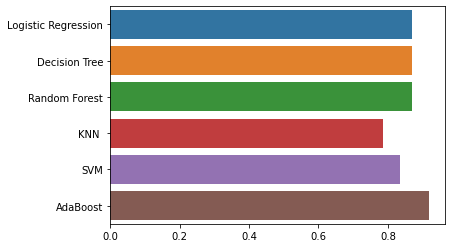

In [61]:
sns.barplot(x="ACCURATE SCORE",y="MODEL",data=data1)
data1.sort_values(by="ACCURATE SCORE",ascending=False)